In [1]:
# first import the necessary libraries

import pandas as pd

#read the csv file

df = pd.read_csv(r'C:\Users\\D E L L\\Downloads\\Spotify Most Streamed Songs.csv')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [2]:
# data cleaing (checking)

# check for any null values

print(df.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
cover_url                0
dtype: int64


In [3]:
df = df.dropna(subset=['key', 'in_shazam_charts'])

df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0)  # Replace NaN with 0
df['key'] = df['key'].fillna('Unknown')  # Replace NaN with 'Unknown'
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')  # Converts to numeric, NaNs for errors

In [4]:
#check for duplicates

duplicates = df.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


In [5]:
# now we can print the dataframe after cleaning

print(df)

                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

In [7]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'cover_url'],
      dtype='object')

In [8]:
df.shape

(817, 25)

In [9]:
df.info

<bound method DataFrame.info of                               track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_mo

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,817.0,1.567931e+00,8.762105e-01,1.0,1.0,1.0,2.000000e+00,8.000000e+00
released_year,817.0,2.018458e+03,1.082927e+01,1930.0,2021.0,2022.0,2.022000e+03,2.023000e+03
released_month,817.0,6.018360e+00,3.572554e+00,1.0,3.0,5.0,9.000000e+00,1.200000e+01
released_day,817.0,1.369645e+01,9.299663e+00,1.0,5.0,13.0,2.200000e+01,3.100000e+01
in_spotify_playlists,817.0,4.849898e+03,7.741126e+03,31.0,829.0,2040.0,4.890000e+03,5.289800e+04
in_spotify_charts,817.0,1.172215e+01,1.861767e+01,0.0,0.0,3.0,1.600000e+01,1.470000e+02
streams,816.0,4.689858e+08,5.231267e+08,2762.0,134284821.0,263836779.5,6.011986e+08,3.562544e+09
in_apple_playlists,817.0,6.016157e+01,7.492359e+01,0.0,12.0,32.0,7.800000e+01,5.320000e+02
in_apple_charts,817.0,4.947368e+01,4.957045e+01,0.0,6.0,34.0,8.400000e+01,2.750000e+02
in_deezer_charts,817.0,2.451652e+00,5.397024e+00,0.0,0.0,0.0,2.000000e+00,4.500000e+01


In [14]:
df[(df['released_year']==2023)]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234.0,67,...,C#,Major,92,66,58,19,0,8,24,https://i.scdn.co/image/ab67616d0000b273e3a09a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,Love Again,The Kid Laroi,1,2023,1,27,1283,0,147538971.0,57,...,B,Minor,66,47,40,72,0,11,3,https://i.scdn.co/image/ab67616d0000b273a53643...
380,LLYLM,ROSALï¿½,1,2023,1,27,1838,0,124988687.0,105,...,F#,Minor,56,56,63,13,0,19,27,https://i.scdn.co/image/ab67616d0000b273b175e5...
382,TRUSTFALL,P!nk,1,2023,1,27,2098,16,134255790.0,88,...,G#,Major,64,25,89,0,0,15,9,https://i.scdn.co/image/ab67616d0000b27302f93e...
398,Muï¿½ï¿½,"Steve Aoki, Tini, La Joaqui",3,2023,1,12,658,6,120972253.0,33,...,A#,Minor,68,83,71,3,0,31,8,Not Found


In [34]:
print(df)

df[(df['released_year']==2023) & (df['artist(s)_name']=='Bad Bunny')]

                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [36]:
df = df.copy()
pd.set_option("display.max_columns",30)

In [37]:
#rename few columns

df.rename(columns={'danceability_%': 'danceability',
    'valence_%': 'valence',
    'energy_%': 'energy',
    'acousticness_%': 'acousticness',
    'instrumentalness_%': 'instrumentalness',
    'liveness_%': 'liveness',
    'speechiness_%': 'speechiness'},inplace=True)

In [38]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3,https://i.scdn.co/image/ab67616d0000b2730f5397...
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6,Not Found
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5,Not Found


In [43]:
# number of artists and records released in a year

df['artist(s)_name'].value_counts(),df['released_year'].value_counts()

(artist(s)_name
 Taylor Swift                                29
 SZA                                         17
 Bad Bunny                                   16
 The Weeknd                                  15
 Kendrick Lamar                              12
                                             ..
 Nessa Barrett                                1
 LF System                                    1
 Mc Vitin Da Igrejinha, MC Tairon, DJ Win     1
 Rels B                                       1
 Drake, DJ Khaled, Lil Baby                   1
 Name: count, Length: 571, dtype: int64,
 released_year
 2022    359
 2023    159
 2021     95
 2019     27
 2020     23
 2017     19
 2016     17
 2014     12
 2013     10
 2018      9
 2011      9
 2015      9
 2012      6
 2010      6
 2002      6
 1999      5
 2004      3
 2000      3
 1963      3
 2008      2
 1959      2
 1985      2
 1991      2
 1984      2
 2003      2
 1982      2
 1958      2
 1986      2
 1970      2
 1975      1
 1973     

In [48]:
# with this we can say taylor swift has the most songs released in a year and 2022 was the year with highest song releases

In [54]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 262.6 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.9 kB 365.7 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 711.9 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
# now lets import matplotlib library for visualization and 

import matplotlib.pyplot as plt
import seaborn as sns

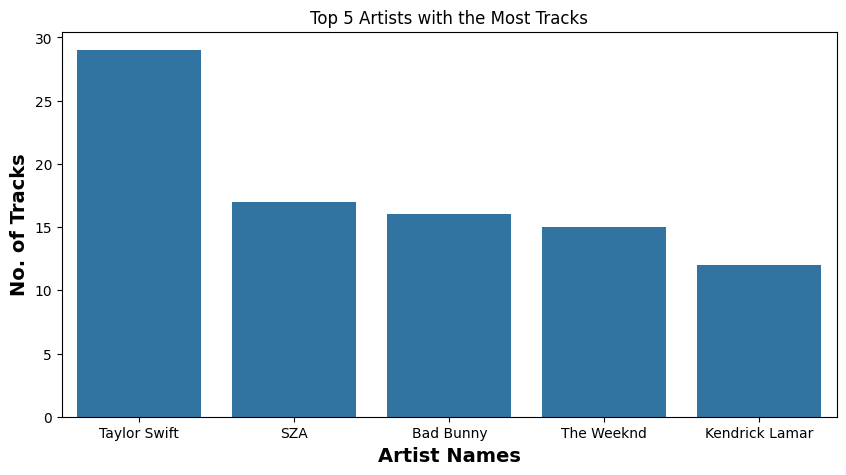

In [56]:
leading_artists = df['artist(s)_name'].value_counts().head(5)

plt.figure(figsize=(10, 5))


sns.barplot(x=leading_artists.index , y=leading_artists )

plt.ylabel('No. of Tracks',fontsize=14, fontweight='bold')
plt.xlabel('Artist Names',fontsize=14, fontweight='bold')
plt.title('Top 5 Artists with the Most Tracks')
plt.show()

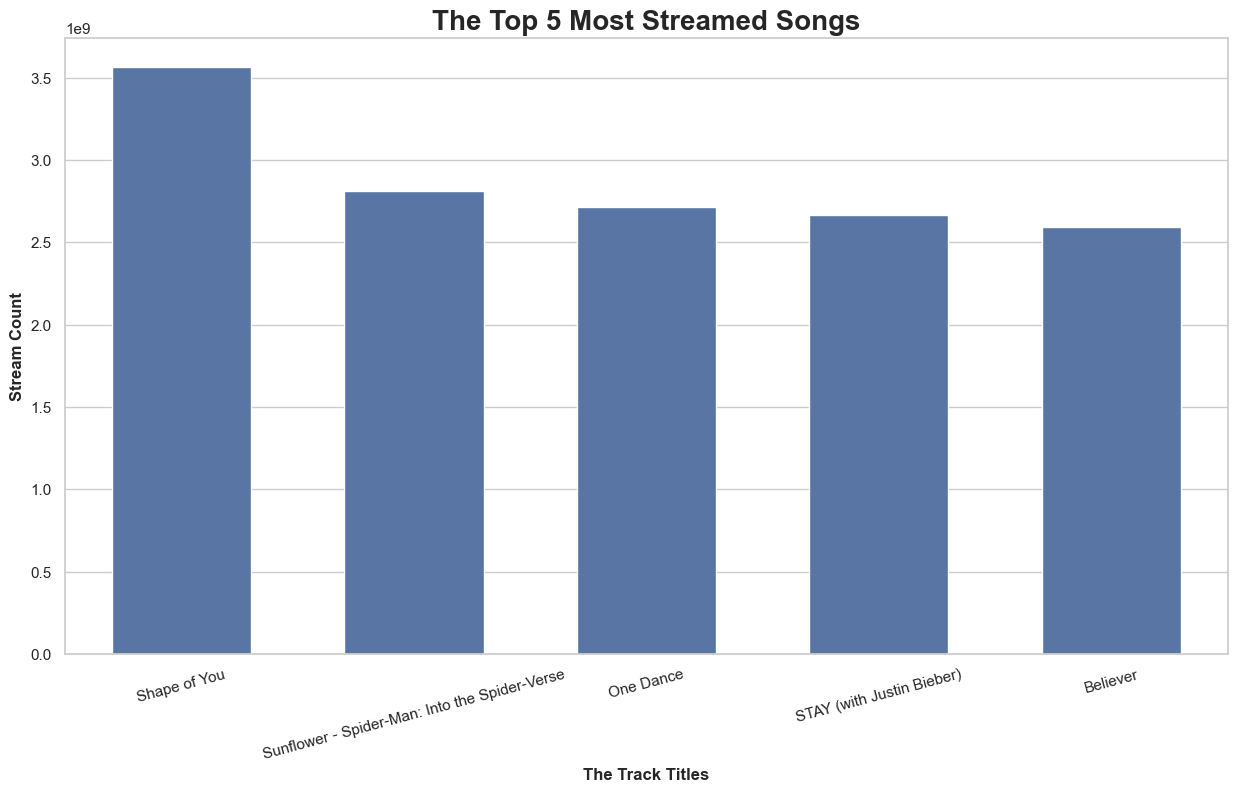

In [68]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
most_streamed_songs = df[['track_name', 'streams']].sort_values(by='streams', ascending=False).head(5)

plt.figure(figsize=(15, 8))
sns.set(style='whitegrid')

sns.barplot(x='track_name', y='streams', data=most_streamed_songs,width=0.6)
plt.xlabel('The Track Titles',fontweight='bold')
plt.ylabel('Stream Count',fontweight='bold')
plt.title('The Top 5 Most Streamed Songs',fontsize=20, fontweight='bold')
plt.xticks(rotation=15)
plt.show()

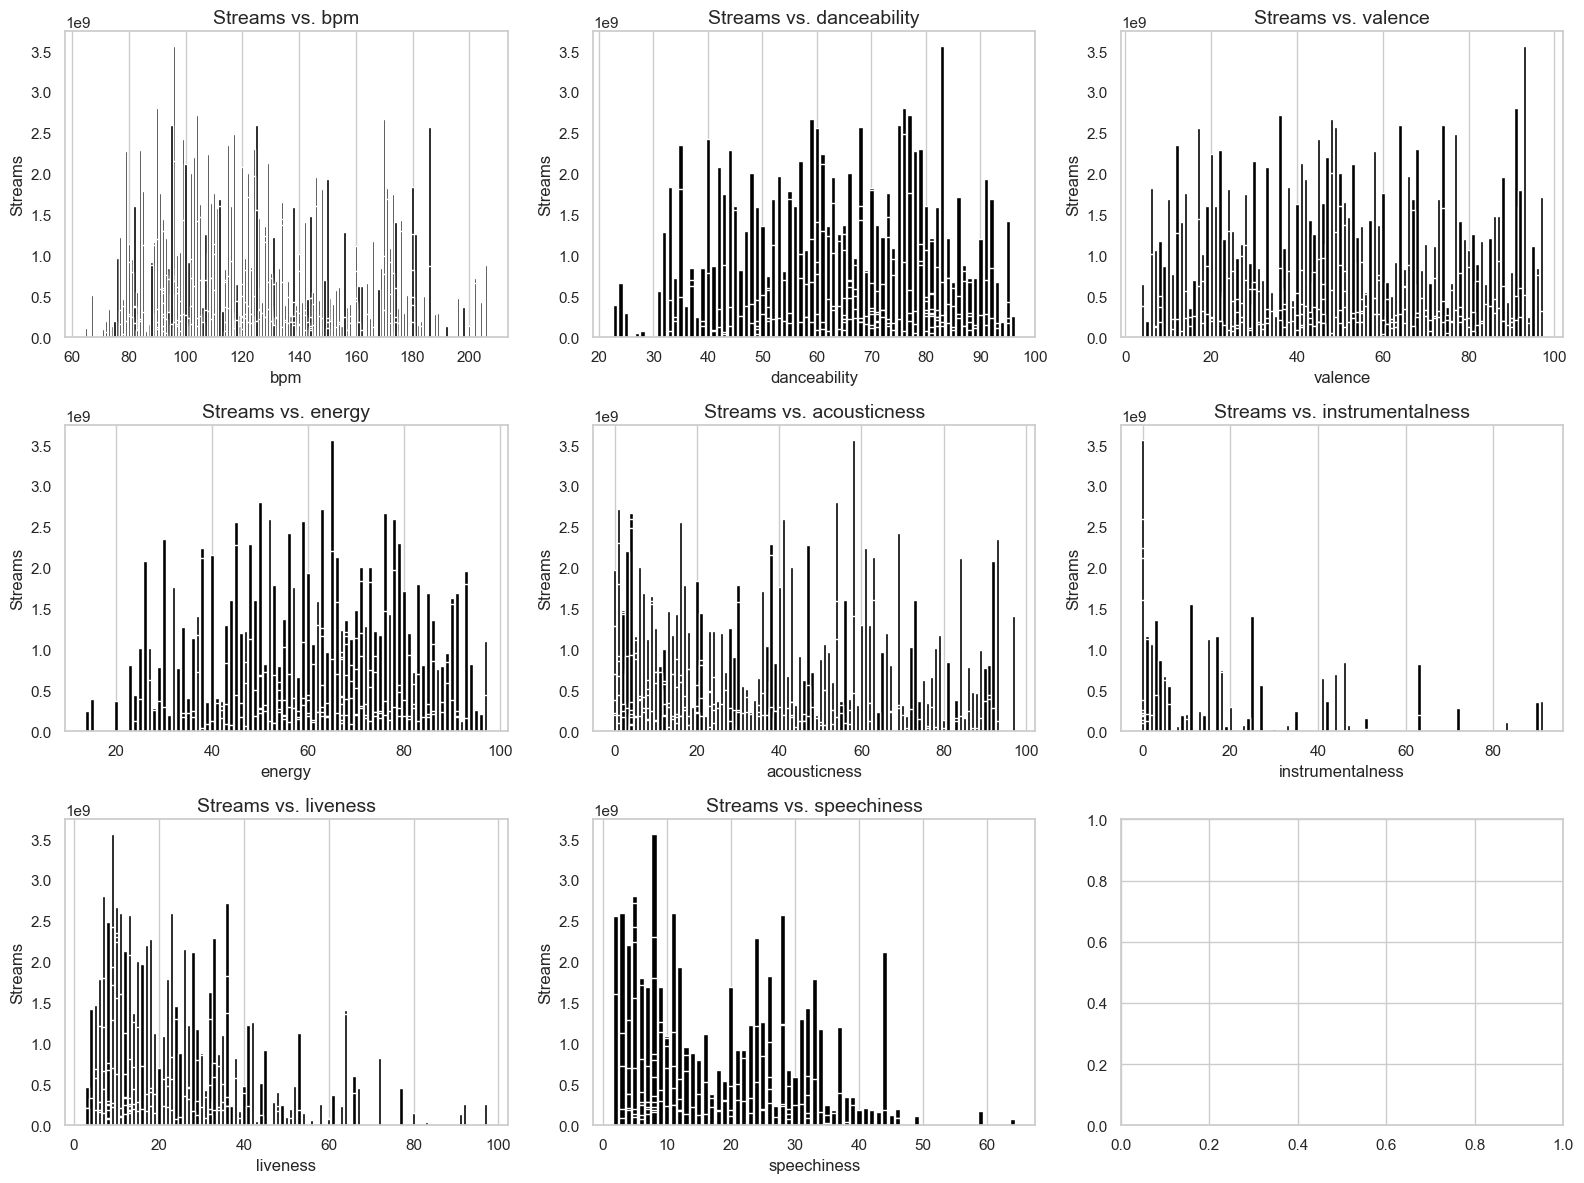

In [67]:
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    plt.bar(df[column], df['streams'], color='black')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [63]:
# visualization of every genre of streams

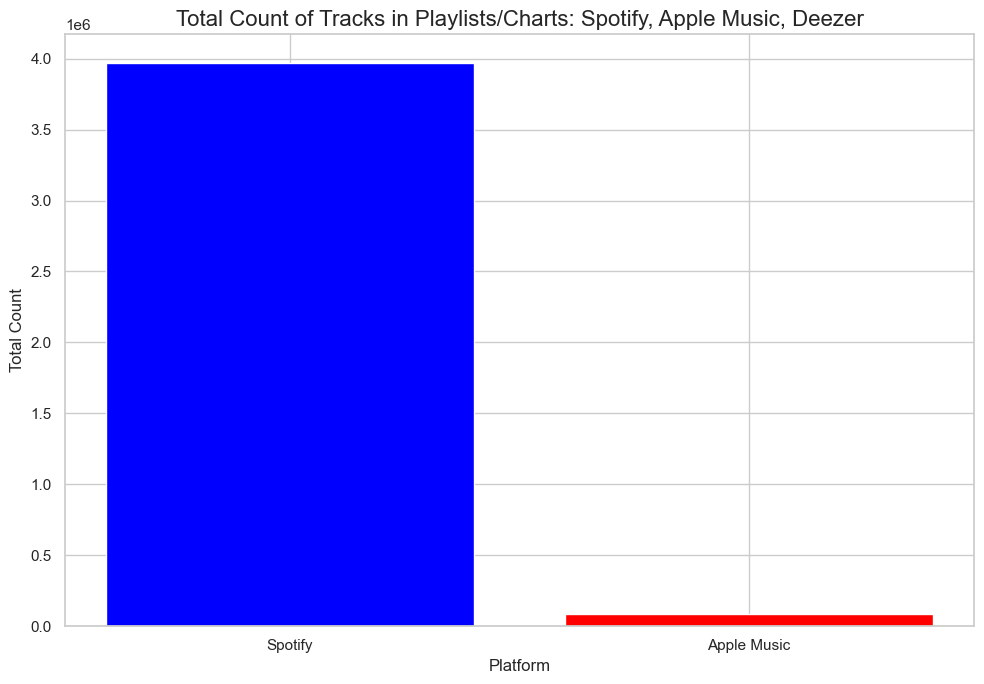

In [66]:
# Calculating the total count of tracks present in playlists/charts for Spotify and Apple Music
total_counts = {'Spotify': df['in_spotify_playlists'].sum() + df['in_spotify_charts'].sum(),
'Apple Music': df['in_apple_playlists'].sum() + df['in_apple_charts'].sum(),
}

# Plotting the total count comparison for Spotify and Apple Music
plt.figure(figsize=(10, 7))
plt.bar(total_counts.keys(), total_counts.values(), color=['blue', 'red'])
plt.title('Total Count of Tracks in Playlists/Charts: Spotify, Apple Music, Deezer', fontsize=16)
plt.ylabel('Total Count')
plt.xlabel('Platform')
plt.tight_layout()
plt.show()

In [ ]:
# as per my analysis spotify has the most amount of user comparing to apple